In [54]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.signal as ss

In [55]:
# misure di tempo in microsecondi
x = np.linspace(0,500,int(500*2.5))
t_rise = 5
t_decay = 50
amplitude = 1
sigma = 0.5*amplitude

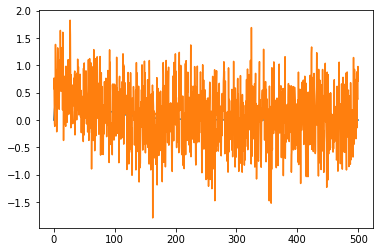

In [56]:
def signal(x, t_rise, t_decay, t_arrival, amplitude):
    return amplitude*(np.exp(-(x-t_arrival)/t_decay)-np.exp(-(x-t_arrival)/t_rise))

def signal_noise(signal, sigma):
    return signal+np.random.normal(0, sigma,size=len(signal))

def noise(sigma):
    return np.random.normal(0, sigma)

segnale = signal(x,t_rise,t_decay,0,amplitude)

plt.plot(x, segnale)
plt.plot(x, signal_noise(segnale, sigma))

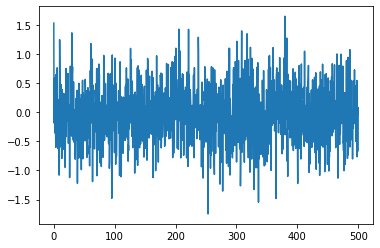

In [57]:
plt.plot(x,np.random.normal(0, sigma,size=len(x)))

Adesso spostiamo random l'arrivo del segnale

119.24600092627777


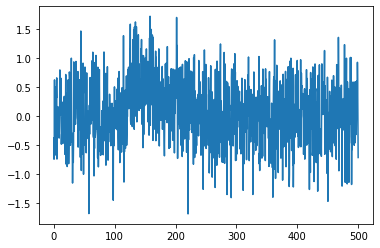

In [58]:
t_arrival = np.random.uniform(0, 0.25*np.max(x))
print(t_arrival)

segnale = signal(x,t_rise,t_decay,t_arrival,amplitude) #questa è la funzione che fa schifo
mod_segnale = np.abs(segnale)

min = mod_segnale[5]
for i in range(0, int(len(x)/2)):
    if mod_segnale[i] < min:
        index_min = i
        min = mod_segnale[i]

segnale_bello = segnale[index_min:]
rumore_iniziale = np.zeros(len(x)-len(segnale_bello))

for j in range(0,index_min-1):
    rumore_iniziale[j] = noise(sigma)

segnale_def = signal_noise(segnale_bello, sigma)
segnale_def = np.append(rumore_iniziale,segnale_def)

plt.plot(x, segnale_def)
#plt.plot(x, signal_noise(segnale, sigma))

Adessio puliamo e triggeriamo

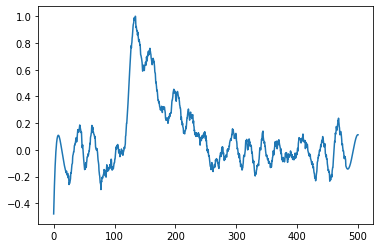

In [65]:
#Proviamo il Savitzky–Golay filter

filt_signal = ss.savgol_filter(segnale_def, 101, 5, deriv=0, delta=1.0, axis=-1, mode='interp', cval=0.0)
plt.plot(x,filt_signal)